Liberies and Data Importation


In [104]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating plots and charts
%matplotlib inline  # Display matplotlib plots within Jupyter Notebook
import seaborn as sns  # For enhanced data visualization
sns.set(style="whitegrid") # Set the style for Seaborn
import datetime  # For date and time manipulation
from datetime import date, timedelta  # Import specific date and timedelta functionality

# Read data from the "control_group.csv" and "test_group.csv" files
control_data = pd.read_csv("control_group.csv", sep=";")  # Read data from the control group CSV file
test_data = pd.read_csv("test_group.csv", sep=";")  # Read data from the test group CSV file


Let’s have a look at both datasets:

In [105]:
# Print the first few rows of the 'control_data' DataFrame
print(control_data.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [106]:
# Print the first few rows of the 'test_data' DataFrame
print(test_data.head())

   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768  


# Data Preparation

The datasets have some errors in column names e.g(# of Add to Cart  \). Let’s give new column names
before moving forward:

In [119]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent",
                        "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

Now let’s see if the datasets have null values or not:

In [108]:
# Print the count of missing values (null or NaN) in each column of the 'control_data' DataFrame
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [109]:
# Print the count of missing values (null or NaN) in each column of the 'test_data' DataFrame
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


The dataset of the control campaign has missing values in a row. Let’s fill in these missing values in the (control_data) dataset by the median value of each column:

In [110]:
# For the 'Number of Impressions' column, fill missing values with the mean of the column
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].median(), inplace=True)

# For the 'Reach' column, fill missing values with the mean of the column
control_data["Reach"].fillna(value=control_data["Reach"].median(), inplace=True)

# For the 'Website Clicks' column, fill missing values with the mean of the column
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].median(), inplace=True)

# For the 'Searches Received' column, fill missing values with the mean of the column
control_data["Searches Received"].fillna(value=control_data["Searches Received"].median(), inplace=True)

# For the 'Content Viewed' column, fill missing values with the mean of the column
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].median(), inplace=True)

# For the 'Added to Cart' column, fill missing values with the mean of the column
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].median(), inplace=True)

# For the 'Purchases' column, fill missing values with the mean of the column
control_data["Purchases"].fillna(value=control_data["Purchases"].median(), inplace=True)


Now I will create a new dataset by merging both datasets:

In [111]:
# Merge the 'control_data' and 'test_data' DataFrames using an outer join, sort the result by the 'Date' column
ab_data = control_data.merge(test_data, how="outer").sort_values(["Date"])

# Reset the index of the merged DataFrame and drop the previous index
ab_data = ab_data.reset_index(drop=True)

# Print the first few rows of the merged DataFrame
print(ab_data.head())

      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          8125.0             2312.0          1804.0          424.0      275.0  
3          2277.0             2475.0          1984.0         1629.0      734.0  
4          3750.0             2893.0          2617.0         1075.0      668.0  


Before moving forward, let’s have a look if the dataset has an equal number of samples about both campaigns:

In [112]:
# Count the occurrences of each unique value in the 'Campaign Name' column of the 'ab_data' DataFrame
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

# A/B Testing

Let's Find the Best Marketing Strategy

To get started with A/B testing, I will first analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:

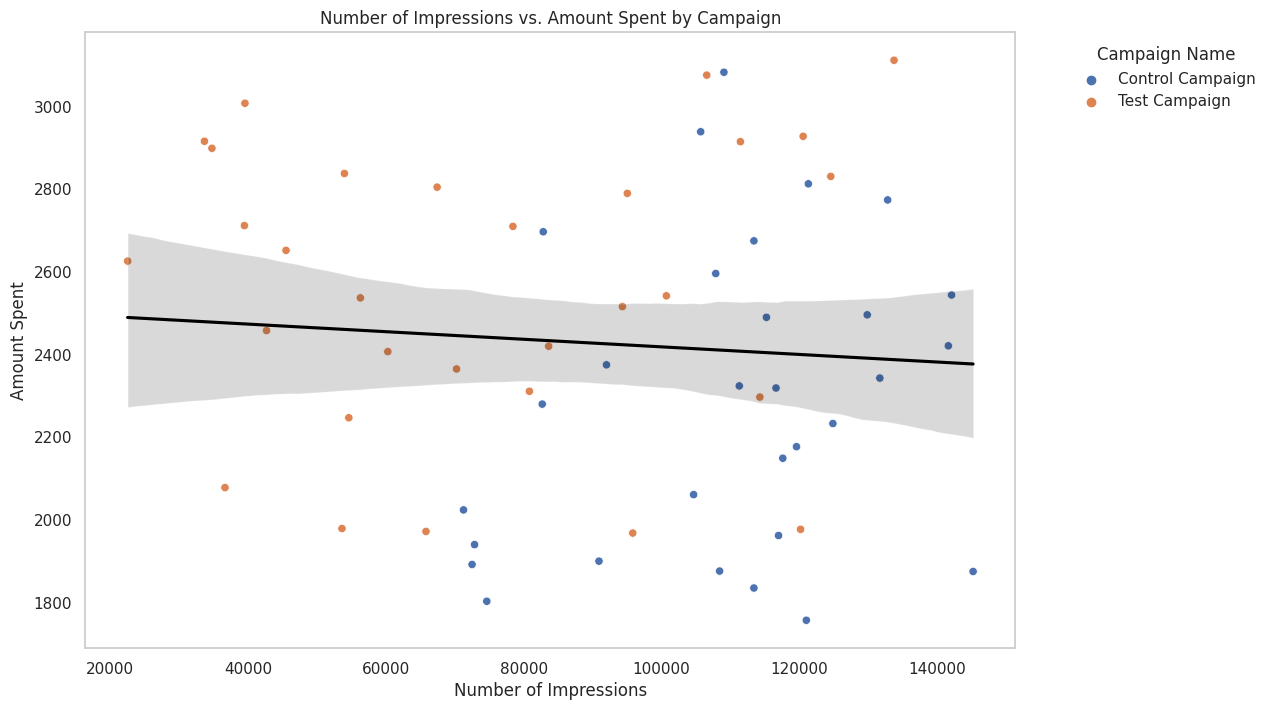

In [202]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=ab_data, x="Number of Impressions", y="Amount Spent", hue="Campaign Name")

# Add a regression line (OLS regression)
sns.regplot(data=ab_data, x="Number of Impressions", y="Amount Spent", scatter=False, color='black')

# Set labels and title
scatter_plot.set(xlabel="Number of Impressions", ylabel="Amount Spent")
plt.title("Number of Impressions vs. Amount Spent by Campaign")

# Show the plot
plt.legend(title="Campaign Name",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

The control campaign resulted in more impressions according to the amount spent on both campaigns.

Now let’s have a look at the number of searches performed on the website from both campaigns:

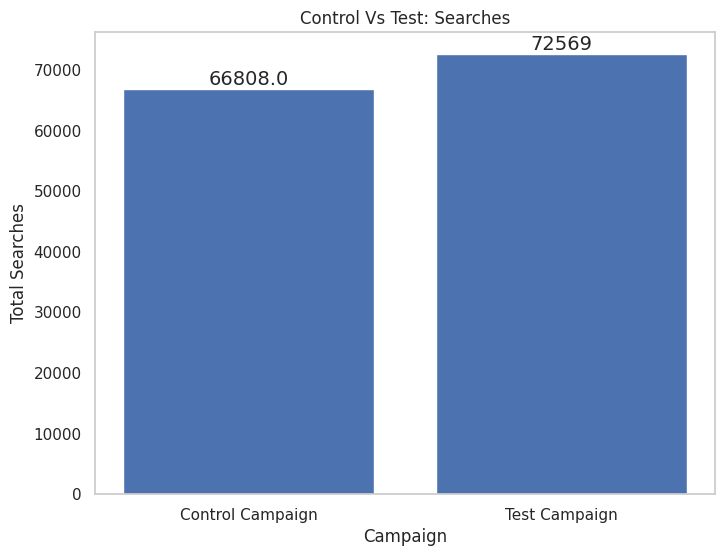

In [161]:
# Data for the bar chart
labels = ["Control Campaign", "Test Campaign"]
counts = [sum(control_data["Searches Received"]), sum(test_data["Searches Received"])]

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Campaign')
plt.ylabel('Total Searches')
plt.title('Control Vs Test: Searches')

# Display data values on the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14)

# Remove grid lines
plt.grid(False)
plt.show()

The test campaign resulted in more searches on the website.

Now let’s have a look at the number of website clicks from both campaigns:

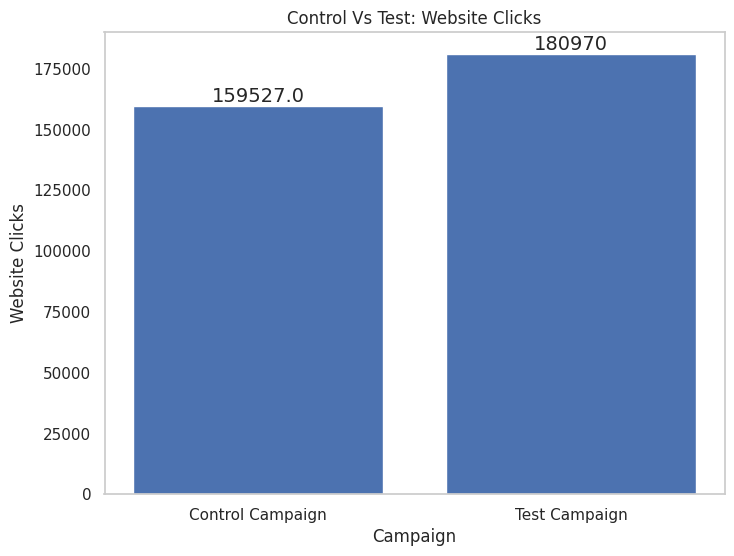

In [162]:
# Data for the bar chart
labels = ["Control Campaign", "Test Campaign"]
counts = [sum(control_data["Website Clicks"]), sum(test_data["Website Clicks"])]

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Campaign')
plt.ylabel('Website Clicks')
plt.title('Control Vs Test: Website Clicks')

# Display data values on the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14)

# Remove grid lines
plt.grid(False)
plt.show()

The test campaign wins in the number of website clicks.

Now let’s have a look at the amount of content viewed after reaching the website from both campaigns:

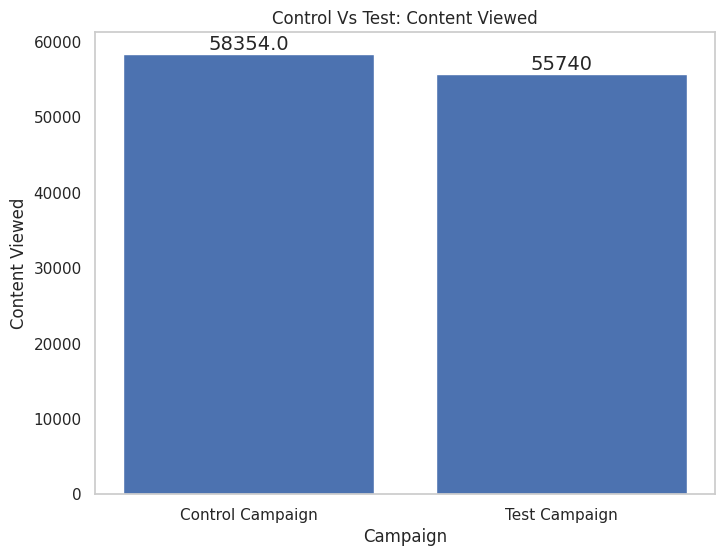

In [164]:
# Data for the bar chart
labels = ["Control Campaign", "Test Campaign"]
counts = [sum(control_data["Content Viewed"]), sum(test_data["Content Viewed"])]

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Campaign')
plt.ylabel('Content Viewed')
plt.title('Control Vs Test: Content Viewed')

# Display data values on the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14)

# Remove grid lines
plt.grid(False)
plt.show()

The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

Now let’s have a look at the number of products added to the cart from both campaigns:


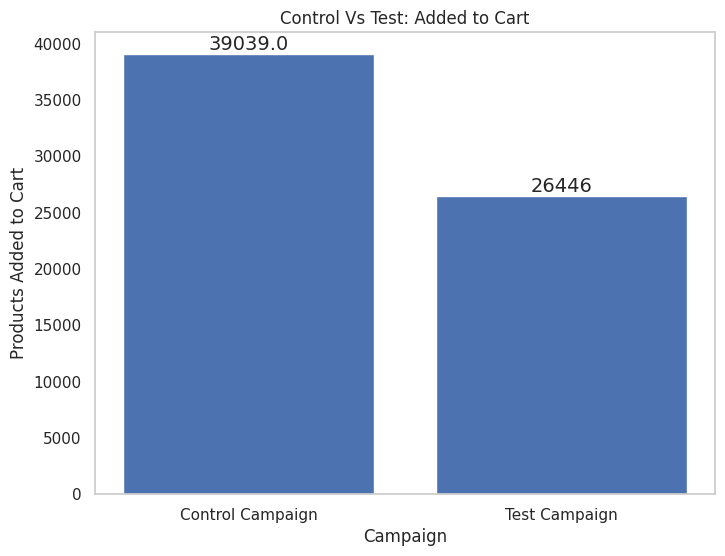

In [165]:
# Data for the bar chart
labels = ["Control Campaign", "Test Campaign"]
counts = [sum(control_data["Added to Cart"]), sum(test_data["Added to Cart"])]

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Campaign')
plt.ylabel('Products Added to Cart')
plt.title('Control Vs Test: Added to Cart')

# Display data values on the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14)

# Remove grid lines
plt.grid(False)
plt.show()

Despite low website clicks more products were added to the cart from the control campaign.

Now let’s have a look at the amount spent on both campaigns:

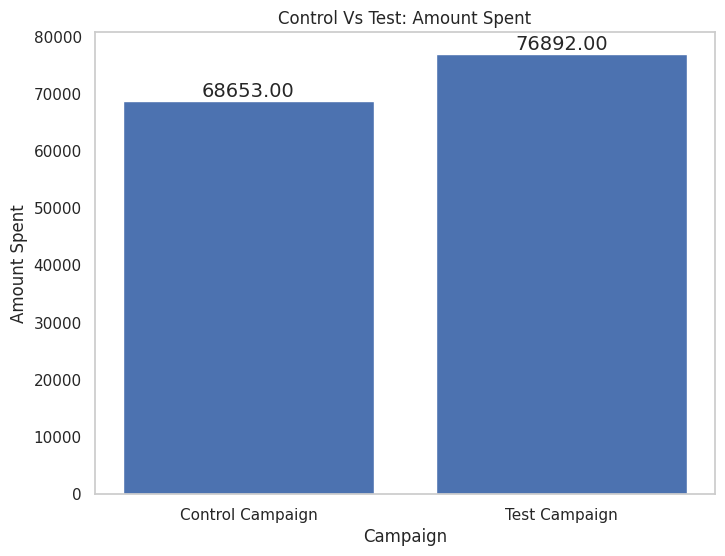

In [166]:
# Data for the bar chart
labels = ["Control Campaign", "Test Campaign"]
counts = [sum(control_data["Amount Spent"]), sum(test_data["Amount Spent"])]

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Campaign')
plt.ylabel('Amount Spent')
plt.title('Control Vs Test: Amount Spent')

# Display data values on the bars
for i, count in enumerate(counts):
    plt.text(i, count, f"{count:.2f}", ha='center', va='bottom', fontsize=14)

# Remove grid lines
plt.grid(False)
plt.show()

The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

Now let’s have a look at the purchases made by both campaigns:

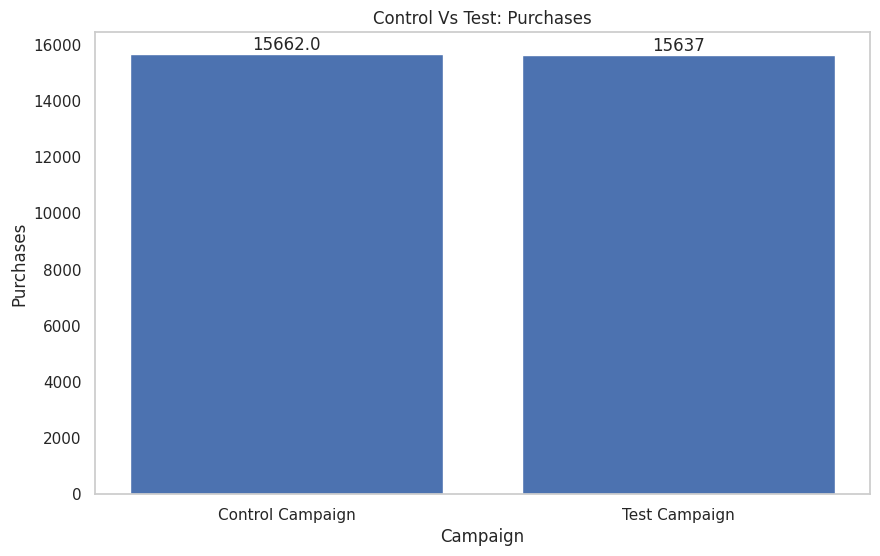

In [176]:
# Data for the bar chart
labels = ["Control Campaign", "Test Campaign"]
counts = [sum(control_data["Purchases"]), sum(test_data["Purchases"])]

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)

# Display data values on the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel("Campaign")
plt.ylabel("Purchases")
plt.title('Control Vs Test: Purchases')
plt.grid(False)
plt.show()

There’s only a difference of around 1% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here!

Now let’s analyze some metrics to find which ad campaign converts more. I will first look at the relationship between the number of website clicks and content viewed from both campaigns:

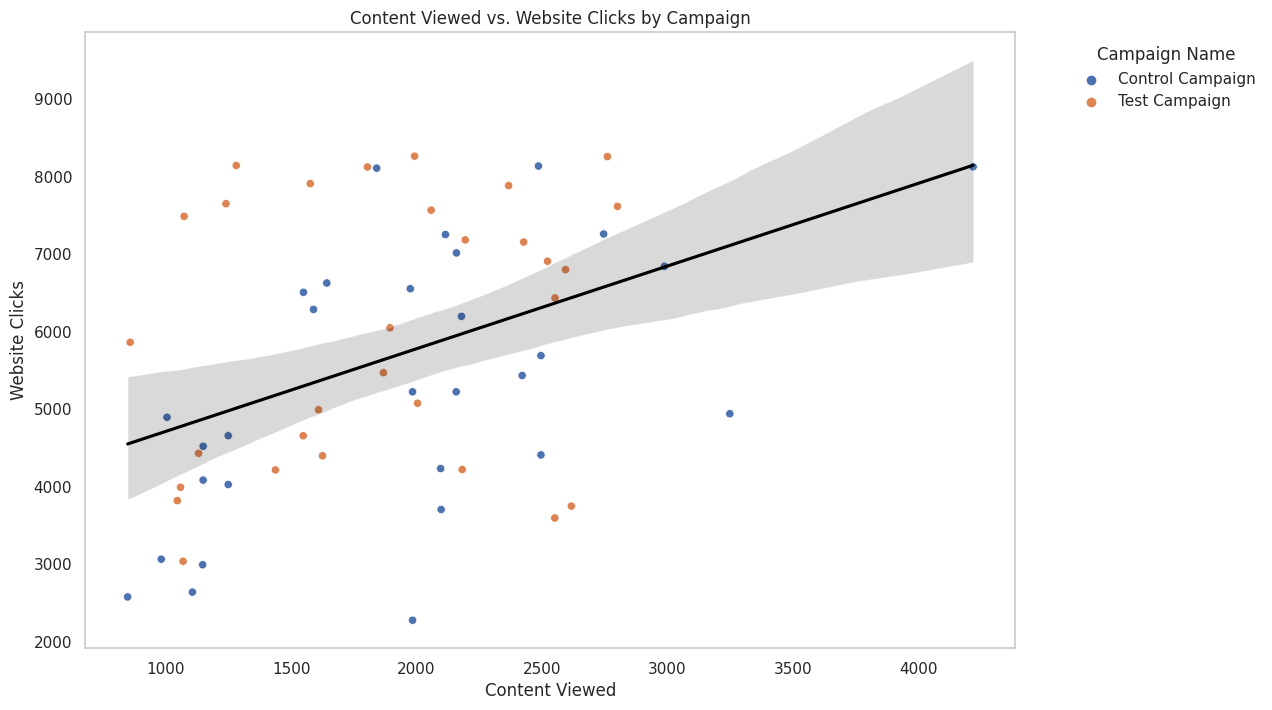

In [201]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=ab_data, x="Content Viewed", y="Website Clicks", hue="Campaign Name", legend="brief")

# Add a trendline (OLS regression line)
sns.regplot(data=ab_data, x="Content Viewed", y="Website Clicks", scatter=False, color='black')

# Set labels and title
scatter_plot.set(xlabel="Content Viewed", ylabel="Website Clicks")
plt.title("Content Viewed vs. Website Clicks by Campaign")

# Show the plot
plt.legend(title="Campaign Name",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

Now I will analyze the relationship between the amount of content viewed and the number of products added to the cart from both campaigns:

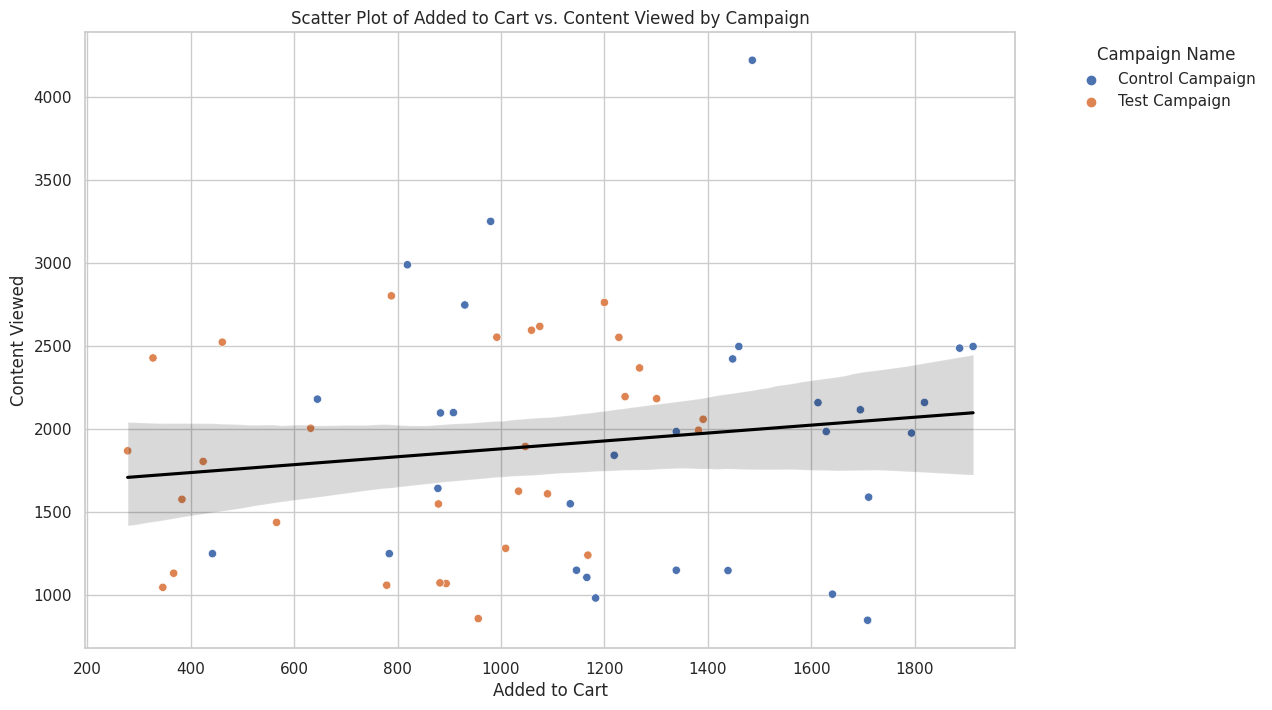

In [203]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=ab_data, x="Added to Cart", y="Content Viewed", hue="Campaign Name")

# Add a trendline (OLS regression line)
sns.regplot(data=ab_data, x="Added to Cart", y="Content Viewed", scatter=False, color='black')

# Set labels and title
scatter_plot.set(xlabel="Added to Cart", ylabel="Content Viewed")
plt.title("Scatter Plot of Added to Cart vs. Content Viewed by Campaign")

# Show the plot
plt.legend(title="Campaign Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Again, the control campaign wins! Now let’s have a look at the relationship between the number of products added to the cart and the number of sales from both campaigns:

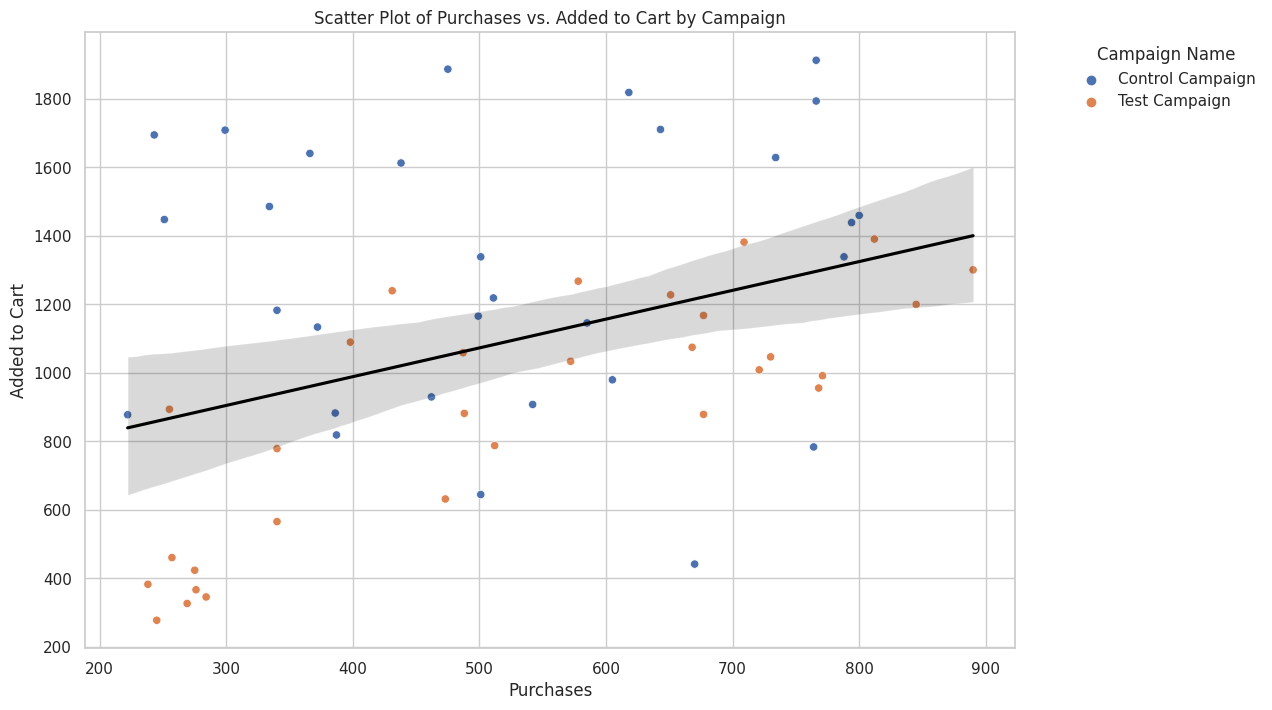

In [204]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=ab_data, x="Purchases", y="Added to Cart", hue="Campaign Name")

# Add a trendline (OLS regression line)
sns.regplot(data=ab_data, x="Purchases", y="Added to Cart", scatter=False, color='black')

# Set labels and title
scatter_plot.set(xlabel="Purchases", ylabel="Added to Cart")
plt.title("Scatter Plot of Purchases vs. Added to Cart by Campaign")

# Show the plot
plt.legend(title="Campaign Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.